Se importan las bibliotecas necesarias.
Se carga el dataset para poder hacer un tratamiento de datos.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# archivos csv
import pandas as pd
# graficador
import matplotlib.pyplot as plt
# estadisticas
import seaborn as sns
# interfaz
import sys
from PyQt6.QtWidgets import QApplication, QMainWindow, QTableView
from PyQt6.QtCore import Qt
from PyQt6.QtCore import Qt, QAbstractTableModel



In [2]:
df = pd.read_csv("./data/dataset_diabetes.csv")
df


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


Traducimos los nombres de las columnas de la tabla

In [3]:
df.columns = ["Genero", "Edad", "Hipertencion", "Cardiopatia", "Historial_fumador", "IMC", "Nivel_HnA1c", "Glucosa_en_sangre", "Diabetes"]
df

,Genero,Edad,Hipertencion,Cardiopatia,Historial_fumador,IMC,Nivel_HnA1c,Glucosa_en_sangre,Diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


Se eliminan las filas que no contienen informacion sobre su historial de fumadores

In [4]:
df = df[df["Historial_fumador"] != "No Info"]
df

,Genero,Edad,Hipertencion,Cardiopatia,Historial_fumador,IMC,Nivel_HnA1c,Glucosa_en_sangre,Diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
...,...,...,...,...,...,...,...,...,...
99992,Female,26.0,0,0,never,34.34,6.5,160,0
99993,Female,40.0,0,0,never,40.69,3.5,155,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


Ahora eliminaremos el indice anterior y se creara uno nuevo de forma ascendente

In [5]:
df = df.reset_index(drop=True)
df

,Genero,Edad,Hipertencion,Cardiopatia,Historial_fumador,IMC,Nivel_HnA1c,Glucosa_en_sangre,Diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Male,28.0,0,0,never,27.32,5.7,158,0
2,Female,36.0,0,0,current,23.45,5.0,155,0
3,Male,76.0,1,1,current,20.14,4.8,155,0
4,Female,20.0,0,0,never,27.32,6.6,85,0
...,...,...,...,...,...,...,...,...,...
64179,Female,26.0,0,0,never,34.34,6.5,160,0
64180,Female,40.0,0,0,never,40.69,3.5,155,0
64181,Male,66.0,0,0,former,27.83,5.7,155,0
64182,Female,24.0,0,0,never,35.42,4.0,100,0


Traduciremos los strings del dataset para una mejor compresion de los datos.

In [6]:
df["Genero"] = df["Genero"].replace({"Male": "Masculino", "Female": "Femenino"})
df["Historial_fumador"] = df["Historial_fumador"].replace({"never": "Nunca", "current": "Actualmente", "former": "Anteriormente"})
df

,Genero,Edad,Hipertencion,Cardiopatia,Historial_fumador,IMC,Nivel_HnA1c,Glucosa_en_sangre,Diabetes
0,Femenino,80.0,0,1,Nunca,25.19,6.6,140,0
1,Masculino,28.0,0,0,Nunca,27.32,5.7,158,0
2,Femenino,36.0,0,0,Actualmente,23.45,5.0,155,0
3,Masculino,76.0,1,1,Actualmente,20.14,4.8,155,0
4,Femenino,20.0,0,0,Nunca,27.32,6.6,85,0
...,...,...,...,...,...,...,...,...,...
64179,Femenino,26.0,0,0,Nunca,34.34,6.5,160,0
64180,Femenino,40.0,0,0,Nunca,40.69,3.5,155,0
64181,Masculino,66.0,0,0,Anteriormente,27.83,5.7,155,0
64182,Femenino,24.0,0,0,Nunca,35.42,4.0,100,0


Ordenando la columnas ascendentemente


In [7]:
# glucosa
df = df.sort_values('Glucosa_en_sangre', ascending=True)


filtros para pacientes

In [8]:
# Filtrar pacientes con nivel de glucosa en sangre superior a 150 y IMC mayor a 25
df = df[(df['Glucosa_en_sangre'] > 150) & (df['IMC'] > 25)]

df


,Genero,Edad,Hipertencion,Cardiopatia,Historial_fumador,IMC,Nivel_HnA1c,Glucosa_en_sangre,Diabetes
46928,Femenino,63.0,0,0,Anteriormente,31.70,4.8,155,0
44112,Femenino,80.0,0,0,Anteriormente,27.32,5.7,155,0
7085,Femenino,41.0,0,0,Nunca,27.32,6.1,155,0
64181,Masculino,66.0,0,0,Anteriormente,27.83,5.7,155,0
20253,Femenino,14.0,0,0,Nunca,29.90,6.1,155,0
...,...,...,...,...,...,...,...,...,...
58956,Masculino,65.0,0,1,Nunca,31.12,7.0,300,1
28987,Femenino,41.0,0,0,not current,30.11,8.8,300,1
8363,Femenino,62.0,0,0,Nunca,43.49,9.0,300,1
36422,Femenino,80.0,1,0,not current,27.32,9.0,300,1


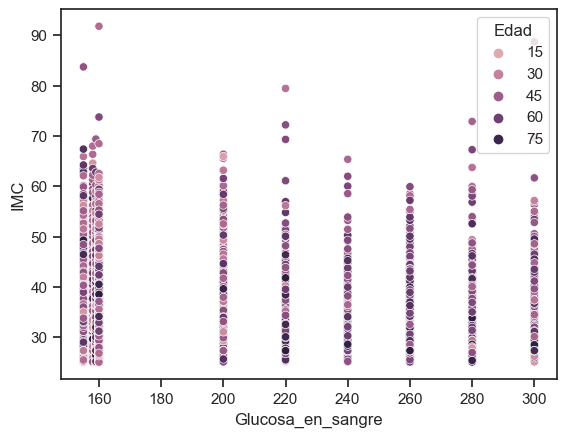

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración opcional para ajustar el estilo de los gráficos
sns.set(style="ticks", palette="pastel")

# Graficar los datos filtrados utilizando Seaborn
sns.scatterplot(data=df, x="Glucosa_en_sangre", y="IMC", hue="Edad")

# Mostrar el gráfico
plt.show()



 Creando interfas para visualizar el dataset.

In [10]:



class MyWindow(QMainWindow):
    def __init__(self, data):
        super().__init__()
        self.setWindowTitle("Dataset Viewer")
        self.resize(800, 600)

        # Crear un modelo de datos de pandas para la tabla
        model = PandasModel(data)

        # Crear una vista de tabla y establecer el modelo de datos
        table_view = QTableView(self)
        table_view.setModel(model)
        table_view.setSortingEnabled(True)

        # Ajustar el tamaño de las columnas al contenido
        table_view.resizeColumnsToContents()

        # Añadir la vista de tabla a la ventana principal
        self.setCentralWidget(table_view)


class PandasModel(QAbstractTableModel):
    def __init__(self, data):
        super().__init__()
        self._data = data
        self._headers = data.columns.tolist()  # Obtener los encabezados de las columnas

    def rowCount(self, parent):
        return len(self._data)

    def columnCount(self, parent):
        return self._data.shape[1]

    def data(self, index, role):
        if role == Qt.ItemDataRole.DisplayRole:
            return str(self._data.iloc[index.row(), index.column()])

        return None

    def headerData(self, section, orientation, role):
        if orientation == Qt.Orientation.Horizontal and role == Qt.ItemDataRole.DisplayRole:
            return self._headers[section]

        return None


if __name__ == "__main__":
    # Crear una aplicación PyQt6
    app = QApplication(sys.argv)

   

    # Crear una ventana y mostrar el dataset
    window = MyWindow(df)
    window.show()

    # Iniciar el bucle de eventos de la aplicación
    sys.exit(app.exec())


SystemExit: 0

C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
